# Data Project

## Data Import, Cleaning and Restructuring

The project's objective is to find out how COVID-19 has affected unemployment across two different segmentations: gender and age. Moreover, we look at whether the increase in the unemployment for people between 16-24 correlates with a decrease
of the labour force between 16-24 and whether the decrease in the labour force between 16-24 correlates with an increase in the enrollment rate in education.
The intuition behind the relations is that there occurs dramatic changes to the opportunity cost for young people: when unemployment increases it is more difficult to get a job especially for unskilled labour, 
young people are primarily unskilled and since it is difficult to obtain a job many will enroll in some form of education. 

Data concerning unemployment and the labour force is pulled from Statistics Denmark API

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

In the following we import, clean and restructure the data. First for unemployment, then for the labour force

In [2]:
#inspecting the table of our dataset
UNEMP_vars = dst.get_variables(table_id = 'AUS07') 
UNEMP_vars

,id,text,elimination,time,values
0,YD,"benefits, sex and age",False,False,"[{'id': 'TOT', 'text': 'Gross unemployment'}, ..."
1,SAESONFAK,seasonal adjustment and actual figures,False,False,"[{'id': '9', 'text': 'Seasonally adjusted figu..."
2,Tid,time,False,True,"[{'id': '2007M01', 'text': '2007M01'}, {'id': ..."


In [3]:
# This to show that we created a loop to see the variables under YD, SAESONFAK and Tid. But we're not running it in the final notebook as it is not relevant to see all the variables.

#for id in ["YD", "SAESONFAK", "Tid"]: 
#    print(id)
#    values = UNEMP_vars.loc[UNEMP_vars.id == id,['values']].values[0,0]
#    for value in values:      
#        print(f' id = {value["id"]}, text = {value["text"]}')

In [4]:
#creating a dictionary for the columns and renaming them in English
columns_dict = {} 
columns_dict['YD'] = 'variable'
columns_dict['SAESONFAK'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

 # var is for variable that will be pulled from the dataset and will serve for later analysis
var_dict = {}
var_dict['TOT'] = 'Gross unemployment'
var_dict['Men'] = 'Men'
var_dict['KVR'] = 'Women'
var_dict['U25'] = '16-24 years'
var_dict['O25'] = '25-29 years'
var_dict['O30'] = '30-39 years'
var_dict['O40'] = '40-49 years'
var_dict['O50'] = '50-59 years'
var_dict['O60'] = '60 years and more'

unit_dict = {}
unit_dict['9'] = 'Seasonally adjusted figures in percent of the labour force'
unit_dict['10'] = 'Seasonally adjusted'


In [5]:
# creating a dataframe of the data
AUS07 = dst.get_data(table_id = "AUS07", variables = {'YD':['*'], 'SAESONFAK':['*'], 'Tid':['*']}) 

In [6]:
 # setting the columns to be the items in columns_dict, unit_dict
AUS07.rename(columns = columns_dict, inplace = True)
for key,value in var_dict.items():
    AUS07.variable.replace(key, value, inplace = True)
    
for key,value in unit_dict.items():
    AUS07.unit.replace(key, value, inplace = True)

In [7]:
# inspecting the dataset
AUS07

,variable,unit,year,value
0,Activation of persons on unemployment benefits,Enumerated actual figures,2010M02,31958.0
1,Activation of persons on social assistance (pr...,Enumerated actual figures,2010M02,16060.8
2,60 years and more,Seasonally adjusted figures in percent of the ...,2009M07,2.5
3,60 years and more,Enumerated actual figures in percent of the l...,2009M07,2.1
4,Gross unemployment,Seasonally adjusted figures in percent of the ...,2009M07,5.0
...,...,...,...,...
10195,Gross unemployment,Seasonally adjusted figures in percent of the ...,2021M02,4.6
10196,16-24 years,Seasonally adjusted,2021M02,8117.3
10197,16-24 years,Enumerated actual figures in percent of the l...,2021M02,2.3
10198,16-24 years,Enumerated actual figures,2021M02,9213.6


In [8]:
# keep values that are in var_dict
I = False
for key,value in var_dict.items():
    I = I | (AUS07.variable == value)
data = AUS07[I]

I = False
for key,value in unit_dict.items():
    I = I | (data.unit == value)
data = data[I]
data

,variable,unit,year,value
2,60 years and more,Seasonally adjusted figures in percent of the ...,2009M07,2.5
4,Gross unemployment,Seasonally adjusted figures in percent of the ...,2009M07,5.0
6,16-24 years,Seasonally adjusted figures in percent of the ...,2009M07,4.4
14,Women,Seasonally adjusted figures in percent of the ...,2009M08,4.3
20,Men,Seasonally adjusted figures in percent of the ...,2009M08,6.0
...,...,...,...,...
10191,60 years and more,Seasonally adjusted figures in percent of the ...,2021M02,5.0
10192,Gross unemployment,Seasonally adjusted,2021M02,131665.3
10195,Gross unemployment,Seasonally adjusted figures in percent of the ...,2021M02,4.6
10196,16-24 years,Seasonally adjusted,2021M02,8117.3


In [9]:
# sorting the dateset by unit and then year
data.sort_values(by=['unit', 'year'], inplace=True)

In [10]:
data

,variable,unit,year,value
2827,Gross unemployment,Seasonally adjusted,2007M01,119018.0
2834,Men,Seasonally adjusted,2007M01,48603.9
2835,Women,Seasonally adjusted,2007M01,70414.1
2836,16-24 years,Seasonally adjusted,2007M01,9440.3
2837,25-29 years,Seasonally adjusted,2007M01,14678.7
...,...,...,...,...
10183,40-49 years,Seasonally adjusted figures in percent of the ...,2021M02,3.8
10187,50-59 years,Seasonally adjusted figures in percent of the ...,2021M02,3.8
10191,60 years and more,Seasonally adjusted figures in percent of the ...,2021M02,5.0
10195,Gross unemployment,Seasonally adjusted figures in percent of the ...,2021M02,4.6


In [11]:
#making a copy of the dataset
R = data.copy()
R = R.reset_index()

R['date'] = R['year'].str.replace('M','')
R['datetime'] = pd.to_datetime(R['date'],format='%Y%m')
R.drop(['year', 'date'], inplace=True, axis=1)
R

,index,variable,unit,value,datetime
0,2827,Gross unemployment,Seasonally adjusted,119018.0,2007-01-01
1,2834,Men,Seasonally adjusted,48603.9,2007-01-01
2,2835,Women,Seasonally adjusted,70414.1,2007-01-01
3,2836,16-24 years,Seasonally adjusted,9440.3,2007-01-01
4,2837,25-29 years,Seasonally adjusted,14678.7,2007-01-01
...,...,...,...,...,...
3055,10183,40-49 years,Seasonally adjusted figures in percent of the ...,3.8,2021-02-01
3056,10187,50-59 years,Seasonally adjusted figures in percent of the ...,3.8,2021-02-01
3057,10191,60 years and more,Seasonally adjusted figures in percent of the ...,5.0,2021-02-01
3058,10195,Gross unemployment,Seasonally adjusted figures in percent of the ...,4.6,2021-02-01


In [12]:
#making a copy of the dataset
R = data.copy()
R = R.reset_index()

#turning the year column into a list
f = R['year'].tolist() 

#replacing the letter in the date
res = [sub.replace('M', '') for sub in f] 

df = pd.DataFrame(res, columns=['date'])

#turning the date column into an integer
df.date.astype('int') 

#merging the dataframe with R
dfs = R.merge(df, left_index=True, right_index=True) 

#creating a new column 'datetime', formatted in date format
dfs['datetime'] = pd.to_datetime(dfs['date'], format = '%Y%m')

dfs["datetime"]=dfs['datetime'].dt.strftime('%m/%Y')

dfs.value = dfs.value.astype('float')

dfs.drop(['year', 'date', 'index'], inplace=True, axis=1)

dfs

,variable,unit,value,datetime
0,Gross unemployment,Seasonally adjusted,119018.0,01/2007
1,Men,Seasonally adjusted,48603.9,01/2007
2,Women,Seasonally adjusted,70414.1,01/2007
3,16-24 years,Seasonally adjusted,9440.3,01/2007
4,25-29 years,Seasonally adjusted,14678.7,01/2007
...,...,...,...,...
3055,40-49 years,Seasonally adjusted figures in percent of the ...,3.8,02/2021
3056,50-59 years,Seasonally adjusted figures in percent of the ...,3.8,02/2021
3057,60 years and more,Seasonally adjusted figures in percent of the ...,5.0,02/2021
3058,Gross unemployment,Seasonally adjusted figures in percent of the ...,4.6,02/2021


First we store slices of the dataset in a dictionary.

In [13]:
#Creating an empty dictionary for storing
group_dict={}

#Looping over dictionary elements
for key, value in var_dict.items():
    #Using local selection to choose each dictionary element.
    group_dict[value]=dfs[(dfs.unit=="Seasonally adjusted") & (dfs.variable==value) ].copy()

In [14]:
group_dict['Gross unemployment']

,variable,unit,value,datetime
0,Gross unemployment,Seasonally adjusted,119018.0,01/2007
9,Gross unemployment,Seasonally adjusted,115165.1,02/2007
18,Gross unemployment,Seasonally adjusted,110045.9,03/2007
27,Gross unemployment,Seasonally adjusted,108612.7,04/2007
36,Gross unemployment,Seasonally adjusted,105135.8,05/2007
...,...,...,...,...
1492,Gross unemployment,Seasonally adjusted,131310.4,10/2020
1501,Gross unemployment,Seasonally adjusted,128382.4,11/2020
1510,Gross unemployment,Seasonally adjusted,125839.2,12/2020
1519,Gross unemployment,Seasonally adjusted,127909.9,01/2021


We now drop unnecessary columns while renaming the remaining ones.

In [15]:
for key,value in group_dict.items():
    #Dropping columns
    group_dict[key].drop(["variable", "unit"], axis=1,inplace=True)
    #Renaming columns
    group_dict[key].rename(columns={"value": key.replace(" ", "")+"_unemployment", "datetime":"date"},inplace=True)

We now create a dataframe holding all the variables as columns

In [16]:
#The dataframe is first set as the first dictionary elements as they are orderedafter using the .keys-function to select keys
Unemployment_data=group_dict["Gross unemployment"]

#Next we loop over keys while merging remaining slices onto the final datafarme. 
for i in list(group_dict.keys())[1:]:
    Unemployment_data=Unemployment_data.merge(group_dict[i],on="date", how = 'left')

In [17]:
#Inspecting the dataset after changes
Unemployment_data


,Grossunemployment_unemployment,date,Men_unemployment,Women_unemployment,16-24years_unemployment,25-29years_unemployment,30-39years_unemployment,40-49years_unemployment,50-59years_unemployment,60yearsandmore_unemployment
0,119018.0,01/2007,48603.9,70414.1,9440.3,14678.7,34902.0,26538.7,29159.3,4299.1
1,115165.1,02/2007,46926.8,68238.3,9243.6,14167.0,33748.3,25663.1,28106.5,4236.7
2,110045.9,03/2007,44921.1,65124.8,8993.8,13627.1,32117.6,24487.7,26721.5,4098.3
3,108612.7,04/2007,44562.1,64050.6,8854.7,13393.2,31449.8,24338.1,26441.3,4135.7
4,105135.8,05/2007,43845.3,61290.5,8657.3,12856.3,30455.7,23592.2,25435.3,4139.0
...,...,...,...,...,...,...,...,...,...,...
165,131310.4,10/2020,67040.3,64270.1,7967.5,24858.1,35691.9,24780.5,25728.7,12283.8
166,128382.4,11/2020,65450.2,62932.2,7788.3,24324.7,35044.5,24022.6,25033.0,12169.4
167,125839.2,12/2020,63445.1,62394.1,7531.7,23962.2,34596.8,23437.0,24215.8,12095.7
168,127909.9,01/2021,64194.7,63715.2,7792.6,24385.0,34756.5,23898.5,24598.7,12478.6


Now we get to data for the Labour force. ILU-data is fundamentally a quarterly set that is reproduced monthly in order to be in line with Eurostat practice. As such we only use this dataset to calculate the labour force


We first need to inspect the central table variables

In [18]:
FORCE_vars = dst.get_variables(table_id = 'AKU100M') #inspecting the table
FORCE_vars

,id,text,elimination,time,values
0,SÆSON,seasonal adjustment,False,False,"[{'id': '10', 'text': 'Seasonally adjusted'}, ..."
1,BESKSTATUS,employment status,True,False,"[{'id': 'BESTOT', 'text': 'Employed'}, {'id': ..."
2,ALDER,age,True,False,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
3,KON,sex,True,False,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
4,Tid,time,False,True,"[{'id': '2008M01', 'text': '2008M01'}, {'id': ..."


In [19]:
# This to show that we created a loop to see the ids under YSÆSON", "BESKSTATUS", "ALDER","KON","Tid. 
# But we're not running it in the final notebook as it is not relevant to see all the variables.

#for id in ["SÆSON", "BESKSTATUS", "ALDER","KON","Tid"]: #creating a loop to see the variables under YD, SAESONFAK and Tid
#    print(id)
#    values = FORCE_vars.loc[FORCE_vars.id == id,['values']].values[0,0]
#    for value in values:      
#        print(f' id = {value["id"]}, text = {value["text"]}')

In [20]:
AKU100M = dst.get_data(table_id = "AKU100M", variables = {'SÆSON':['*'], 'BESKSTATUS':['*'],'KON':['*'], 'ALDER':['*'], 'Tid':['*']}) # creating a dataframe of the data

Now we create dictionaries for selection

In [21]:
#creating a dictionary for the columns and renaming them in English
columns_dict1 = {} 
columns_dict1['SÆSON'] = 'season'
columns_dict1['BESKSTATUS'] = 'employment_status'
columns_dict1['KON'] = 'gender'
columns_dict1['ALDER'] = 'age'
columns_dict1['TID'] = "time"
columns_dict1["INDHOLD"] = "persons"

season_dict = {}
season_dict["Seasonally adjusted"] = "Seasonally adjusted"


# var is for variable that will be pulled from the dataset and will serve for later analysis
var_dict1 = {} 
var_dict1['Employed'] = 'Employed'
var_dict1['ILO-unemployed'] = 'Unemployment'

sex_dict1 = {}
sex_dict1['Total'] = 'total'
sex_dict1['Men'] = 'men'
sex_dict1["Women"] = 'women'

age_dict1 = {}
age_dict1["Age, total"] = "total"
age_dict1["15-24 years"] = "age group 15-24"
age_dict1["25-74 years"] = "age group 25-74"


In [22]:
AKU100M

,SÆSON,BESKSTATUS,KON,ALDER,TID,INDHOLD
0,Non-seasonally adjusted,ILO-unemployed,Total,25-74 years,2011M05,142
1,Non-seasonally adjusted,Employed,Women,"Age, total",2011M05,1272
2,Non-seasonally adjusted,Employed,Men,"Age, total",2011M05,1409
3,Non-seasonally adjusted,Employed,Total,"Age, total",2011M05,2681
4,Non-seasonally adjusted,Employed,Women,15-24 years,2011M05,189
...,...,...,...,...,...,...
5683,Non-seasonally adjusted,Employed,Men,15-24 years,2021M02,184
5684,Non-seasonally adjusted,Employed,Total,15-24 years,2021M02,358
5685,Non-seasonally adjusted,Employed,Women,25-74 years,2021M02,1138
5686,Non-seasonally adjusted,Employed,Men,25-74 years,2021M02,1303


We now use the dictionary to rename row elements

In [23]:
# setting the columns to be the items in columns_dict
AKU100M.rename(columns = columns_dict1, inplace = True)


for key,value in season_dict.items():
    AKU100M.season.replace(key, value, inplace = True)
for key,value in sex_dict1.items():
    AKU100M.gender.replace(key, value, inplace = True)
for key,value in var_dict1.items():
    AKU100M.employment_status.replace(key, value, inplace = True)
for key,value in age_dict1.items():
    AKU100M.age.replace(key, value, inplace = True)

In [24]:
AKU100M

,season,employment_status,gender,age,time,persons
0,Non-seasonally adjusted,Unemployment,total,age group 25-74,2011M05,142
1,Non-seasonally adjusted,Employed,women,total,2011M05,1272
2,Non-seasonally adjusted,Employed,men,total,2011M05,1409
3,Non-seasonally adjusted,Employed,total,total,2011M05,2681
4,Non-seasonally adjusted,Employed,women,age group 15-24,2011M05,189
...,...,...,...,...,...,...
5683,Non-seasonally adjusted,Employed,men,age group 15-24,2021M02,184
5684,Non-seasonally adjusted,Employed,total,age group 15-24,2021M02,358
5685,Non-seasonally adjusted,Employed,women,age group 25-74,2021M02,1138
5686,Non-seasonally adjusted,Employed,men,age group 25-74,2021M02,1303


In [25]:
I = False
for key,value in season_dict.items():
    I = I | (AKU100M.season == value)
data1 = AKU100M[I].copy()

In [26]:
data1

,season,employment_status,gender,age,time,persons
10,Seasonally adjusted,Unemployment,women,total,2011M06,100
11,Seasonally adjusted,Unemployment,men,total,2011M06,120
12,Seasonally adjusted,Unemployment,total,total,2011M06,220
13,Seasonally adjusted,Unemployment,women,age group 15-24,2011M06,30
14,Seasonally adjusted,Unemployment,men,age group 15-24,2011M06,43
...,...,...,...,...,...,...
5665,Seasonally adjusted,Employed,men,age group 15-24,2021M02,184
5666,Seasonally adjusted,Employed,total,age group 15-24,2021M02,362
5667,Seasonally adjusted,Employed,women,age group 25-74,2021M02,1141
5668,Seasonally adjusted,Employed,men,age group 25-74,2021M02,1309


Next we format the dataframe with datetime.

In [27]:
#Sorting values by time
data1.sort_values(by=["time"], inplace=True)

#Copying the data
R1 = data1.copy()
R1 = R1.reset_index()
f1 = R1['time'].tolist() #turning the year column into a list

#replacing the letter in the date
res1 = [sub.replace('M', '') for sub in f1] 


df1 = pd.DataFrame(res1, columns=['date'])
df1.date.astype('int')

dfs1 = R1.merge(df1, left_index=True, right_index=True)

#creating a new column 'datetime', formatted in date format
dfs1['date'] = pd.to_datetime(dfs1['date'], format = '%Y%m')

dfs1["date"]=dfs1["date"].dt.strftime('%m/%Y')

dfs1.persons = dfs1.persons.astype('float')

In [28]:
dfs1

,index,season,employment_status,gender,age,time,persons,date
0,367,Seasonally adjusted,Unemployment,men,total,2008M01,42.0,01/2008
1,382,Seasonally adjusted,Employed,men,age group 25-74,2008M01,1283.0,01/2008
2,381,Seasonally adjusted,Employed,women,age group 25-74,2008M01,1128.0,01/2008
3,380,Seasonally adjusted,Employed,total,age group 15-24,2008M01,386.0,01/2008
4,379,Seasonally adjusted,Employed,men,age group 15-24,2008M01,200.0,01/2008
...,...,...,...,...,...,...,...,...
2839,5653,Seasonally adjusted,Unemployment,men,total,2021M02,92.0,02/2021
2840,5652,Seasonally adjusted,Unemployment,women,total,2021M02,92.0,02/2021
2841,5668,Seasonally adjusted,Employed,men,age group 25-74,2021M02,1309.0,02/2021
2842,5659,Seasonally adjusted,Unemployment,men,age group 25-74,2021M02,70.0,02/2021


In [29]:
# Creating an empty dictionary
group_dict1={}
#Looping over different dictionaries
for key2, value2 in sex_dict1.items():
    for key3, value3 in age_dict1.items():
        #Creating an empty list for storing
        data_list=[]
        #Creating a dictionary key
        fin_key=value2.replace(" ", "")+"_"+value3.replace(" ", "")
        for key1,value1 in var_dict1.items():
            #Select data
            data_el=dfs1[(dfs1.gender==value2) & (dfs1.age==value3) & (dfs1.employment_status==value1)]
            #Drop irrelevant data
            data_el.drop(["season", "employment_status", "gender", "age", "index", "time"], axis=1, inplace=True)
            # Rename columns
            data_el.rename(columns={"date": "date", "persons": value1 }, inplace=True)
            #Append into the storing list
            data_list.append(data_el)
#             print(data_el)
        # Calculating labour force
        data2=data_list[0].merge(data_list[1],on="date", how = 'left')
        data2["lab_force"]=data2["Unemployment"]+data2["Employed"]
        # Drop unnecessary columns
        data2.drop(["Unemployment", "Employed"],axis=1, inplace=True)
        print(data2)
        #Store elements in the dictionary
        group_dict1[fin_key]=data2
# Rename dictionary elements columns. 
for key,value in group_dict1.items():
    group_dict1[key].rename(columns={"date": "date", "lab_force":"lab_force"+"_"+key }, inplace=True)

        date  lab_force
0    01/2008     2891.0
1    02/2008     2893.0
2    03/2008     2902.0
3    04/2008     2917.0
4    05/2008     2917.0
..       ...        ...
153  10/2020     3041.0
154  11/2020     3039.0
155  12/2020     3022.0
156  01/2021     3002.0
157  02/2021     2996.0

[158 rows x 2 columns]
        date  lab_force
0    01/2008      420.0
1    02/2008      422.0
2    03/2008      430.0
3    04/2008      443.0
4    05/2008      441.0
..       ...        ...
153  10/2020      429.0
154  11/2020      428.0
155  12/2020      418.0
156  01/2021      414.0
157  02/2021      407.0

[158 rows x 2 columns]
        date  lab_force
0    01/2008     2471.0
1    02/2008     2471.0
2    03/2008     2473.0
3    04/2008     2474.0
4    05/2008     2477.0
..       ...        ...
153  10/2020     2612.0
154  11/2020     2611.0
155  12/2020     2605.0
156  01/2021     2590.0
157  02/2021     2589.0

[158 rows x 2 columns]
        date  lab_force
0    01/2008     1525.0
1    02/2008    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\l

In [30]:
group_dict1["total_total"]

,date,lab_force_total_total
0,01/2008,2891.0
1,02/2008,2893.0
2,03/2008,2902.0
3,04/2008,2917.0
4,05/2008,2917.0
...,...,...
153,10/2020,3041.0
154,11/2020,3039.0
155,12/2020,3022.0
156,01/2021,3002.0


We then merge dictionary elements into a single dataframe

In [31]:
#Selecting the first dictionary key
force_data=group_dict1["total_total"]

#Looping over dictionary keys beyond the first one
for i in list(group_dict1.keys())[1:]:
    force_data=force_data.merge(group_dict1[i],on="date", how = 'left')

In [32]:
force_data

,date,lab_force_total_total,lab_force_total_agegroup15-24,lab_force_total_agegroup25-74,lab_force_men_total,lab_force_men_agegroup15-24,lab_force_men_agegroup25-74,lab_force_women_total,lab_force_women_agegroup15-24,lab_force_women_agegroup25-74
0,01/2008,2891.0,420.0,2471.0,1525.0,216.0,1308.0,1367.0,204.0,1162.0
1,02/2008,2893.0,422.0,2471.0,1533.0,216.0,1317.0,1360.0,206.0,1154.0
2,03/2008,2902.0,430.0,2473.0,1541.0,219.0,1322.0,1362.0,211.0,1151.0
3,04/2008,2917.0,443.0,2474.0,1551.0,228.0,1323.0,1365.0,215.0,1151.0
4,05/2008,2917.0,441.0,2477.0,1557.0,230.0,1327.0,1361.0,212.0,1149.0
...,...,...,...,...,...,...,...,...,...,...
153,10/2020,3041.0,429.0,2612.0,1606.0,218.0,1387.0,1436.0,211.0,1226.0
154,11/2020,3039.0,428.0,2611.0,1604.0,218.0,1386.0,1435.0,210.0,1225.0
155,12/2020,3022.0,418.0,2605.0,1599.0,213.0,1386.0,1423.0,205.0,1219.0
156,01/2021,3002.0,414.0,2590.0,1592.0,210.0,1382.0,1410.0,204.0,1206.0


Then merge the two datsets into a single dataframe

In [33]:
Unemployment_data=Unemployment_data.merge(force_data, on="date", how="left")
Unemployment_data

,Grossunemployment_unemployment,date,Men_unemployment,Women_unemployment,16-24years_unemployment,25-29years_unemployment,30-39years_unemployment,40-49years_unemployment,50-59years_unemployment,60yearsandmore_unemployment,lab_force_total_total,lab_force_total_agegroup15-24,lab_force_total_agegroup25-74,lab_force_men_total,lab_force_men_agegroup15-24,lab_force_men_agegroup25-74,lab_force_women_total,lab_force_women_agegroup15-24,lab_force_women_agegroup25-74
0,119018.0,01/2007,48603.9,70414.1,9440.3,14678.7,34902.0,26538.7,29159.3,4299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115165.1,02/2007,46926.8,68238.3,9243.6,14167.0,33748.3,25663.1,28106.5,4236.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110045.9,03/2007,44921.1,65124.8,8993.8,13627.1,32117.6,24487.7,26721.5,4098.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108612.7,04/2007,44562.1,64050.6,8854.7,13393.2,31449.8,24338.1,26441.3,4135.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105135.8,05/2007,43845.3,61290.5,8657.3,12856.3,30455.7,23592.2,25435.3,4139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,131310.4,10/2020,67040.3,64270.1,7967.5,24858.1,35691.9,24780.5,25728.7,12283.8,3041.0,429.0,2612.0,1606.0,218.0,1387.0,1436.0,211.0,1226.0
166,128382.4,11/2020,65450.2,62932.2,7788.3,24324.7,35044.5,24022.6,25033.0,12169.4,3039.0,428.0,2611.0,1604.0,218.0,1386.0,1435.0,210.0,1225.0
167,125839.2,12/2020,63445.1,62394.1,7531.7,23962.2,34596.8,23437.0,24215.8,12095.7,3022.0,418.0,2605.0,1599.0,213.0,1386.0,1423.0,205.0,1219.0
168,127909.9,01/2021,64194.7,63715.2,7792.6,24385.0,34756.5,23898.5,24598.7,12478.6,3002.0,414.0,2590.0,1592.0,210.0,1382.0,1410.0,204.0,1206.0


We finally compute relative changes for each column element

In [34]:
# I first define a list containg all columns except the date. 
column_list=list(Unemployment_data.columns)
column_list.remove("date")
#Next i loop over column elements in order to compute pct-change
for i in column_list:
    name=str(i)+"_rel"
    print(Unemployment_data[i])
    Unemployment_data[name]=Unemployment_data[i].pct_change()
#     Unemployment_data[name]=1

0      119018.0
1      115165.1
2      110045.9
3      108612.7
4      105135.8
         ...   
165    131310.4
166    128382.4
167    125839.2
168    127909.9
169    131665.3
Name: Grossunemployment_unemployment, Length: 170, dtype: float64
0      48603.9
1      46926.8
2      44921.1
3      44562.1
4      43845.3
        ...   
165    67040.3
166    65450.2
167    63445.1
168    64194.7
169    65941.3
Name: Men_unemployment, Length: 170, dtype: float64
0      70414.1
1      68238.3
2      65124.8
3      64050.6
4      61290.5
        ...   
165    64270.1
166    62932.2
167    62394.1
168    63715.2
169    65724.0
Name: Women_unemployment, Length: 170, dtype: float64
0      9440.3
1      9243.6
2      8993.8
3      8854.7
4      8657.3
        ...  
165    7967.5
166    7788.3
167    7531.7
168    7792.6
169    8117.3
Name: 16-24years_unemployment, Length: 170, dtype: float64
0      14678.7
1      14167.0
2      13627.1
3      13393.2
4      12856.3
        ...   
165    24858.1
166 

In [35]:
Unemployment_data

,Grossunemployment_unemployment,date,Men_unemployment,Women_unemployment,16-24years_unemployment,25-29years_unemployment,30-39years_unemployment,40-49years_unemployment,50-59years_unemployment,60yearsandmore_unemployment,...,60yearsandmore_unemployment_rel,lab_force_total_total_rel,lab_force_total_agegroup15-24_rel,lab_force_total_agegroup25-74_rel,lab_force_men_total_rel,lab_force_men_agegroup15-24_rel,lab_force_men_agegroup25-74_rel,lab_force_women_total_rel,lab_force_women_agegroup15-24_rel,lab_force_women_agegroup25-74_rel
0,119018.0,01/2007,48603.9,70414.1,9440.3,14678.7,34902.0,26538.7,29159.3,4299.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115165.1,02/2007,46926.8,68238.3,9243.6,14167.0,33748.3,25663.1,28106.5,4236.7,...,-0.014515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110045.9,03/2007,44921.1,65124.8,8993.8,13627.1,32117.6,24487.7,26721.5,4098.3,...,-0.032667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108612.7,04/2007,44562.1,64050.6,8854.7,13393.2,31449.8,24338.1,26441.3,4135.7,...,0.009126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105135.8,05/2007,43845.3,61290.5,8657.3,12856.3,30455.7,23592.2,25435.3,4139.0,...,0.000798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,131310.4,10/2020,67040.3,64270.1,7967.5,24858.1,35691.9,24780.5,25728.7,12283.8,...,-0.015745,0.001977,0.000000,0.002302,0.002497,-0.004566,0.002168,0.002094,0.004762,0.002453
166,128382.4,11/2020,65450.2,62932.2,7788.3,24324.7,35044.5,24022.6,25033.0,12169.4,...,-0.009313,-0.000658,-0.002331,-0.000383,-0.001245,0.000000,-0.000721,-0.000696,-0.004739,-0.000816
167,125839.2,12/2020,63445.1,62394.1,7531.7,23962.2,34596.8,23437.0,24215.8,12095.7,...,-0.006056,-0.005594,-0.023364,-0.002298,-0.003117,-0.022936,0.000000,-0.008362,-0.023810,-0.004898
168,127909.9,01/2021,64194.7,63715.2,7792.6,24385.0,34756.5,23898.5,24598.7,12478.6,...,0.031656,-0.006618,-0.009569,-0.005758,-0.004378,-0.014085,-0.002886,-0.009136,-0.004878,-0.010664


In [36]:
Unemployment_data['Men_unemployment_rel']

0           NaN
1     -0.034505
2     -0.042741
3     -0.007992
4     -0.016085
         ...   
165   -0.025348
166   -0.023719
167   -0.030636
168    0.011815
169    0.027208
Name: Men_unemployment_rel, Length: 170, dtype: float64

## Analysis - Graphs

### Total Unemployment

As expected, we see a steep increase in the unemployment in March where the lockdown was announced. Notice that the unemployment increases immediately while the theory of labour hoarding suggets that unemployment is lagged.

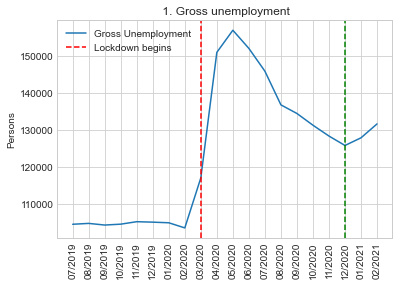

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["Grossunemployment_unemployment"].tail(20), label = "Gross Unemployment" )

# setting a line to show when the lockdowns took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red',label='Lockdown begins')
plt.axvline(x = '12/2020', linestyle = "--", color = 'green')

# setting title and label
ax.set_ylabel('Persons')
plt.title(' 1. Gross unemployment')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

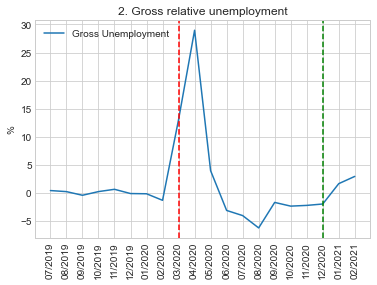

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["Grossunemployment_unemployment_rel"].tail(20)*100, label = "Gross Unemployment" )

# setting a line to show when the lockdowns took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')
plt.axvline(x = '12/2020', linestyle = "--", color = 'green')

# setting title and label
ax.set_ylabel('%')
plt.title('2. Gross relative unemployment')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

### Differences across gender

In the graph we see a steeper increase in men than women. A reason could be because more men work in the private sector, which is more sensitive to business cycle movements.

Even though the lockdown took place in March, there already seems to be an increase in unemployment across both genders, which becomes steeper from March.
After peaking in April, unemployment was lowering until December 2020, where it seems to be increasing again. This might be due to the second lockdown that happened around Christmas.

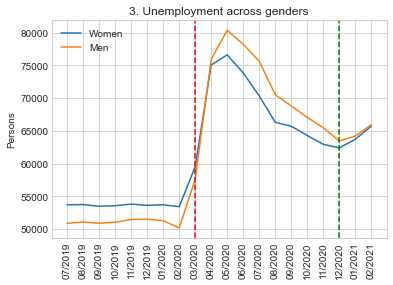

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20), Unemployment_data["Women_unemployment"].tail(20), label = "Women" )
ax.plot(Unemployment_data["date"].tail(20), Unemployment_data["Men_unemployment"].tail(20), label = "Men" )

# setting a line to show when the lockdowns took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')
plt.axvline(x = '12/2020', linestyle = "--", color = 'green')

# setting title and label
ax.set_ylabel('Persons')
plt.title('3. Unemployment across genders')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

In the "Relative unemploymnt rate among genders" graph a similar phenomena can be seen, but obsereved through relative rate instead.

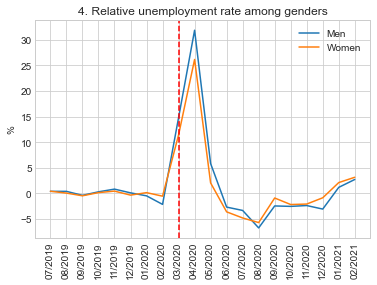

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["Men_unemployment_rel"].tail(20)*100,label = "Men" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["Women_unemployment_rel"].tail(20)*100, label = "Women" )

# setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color ='red')

# setting title and label
ax.set_ylabel('%')
plt.title('4. Relative unemployment rate among genders')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation=90);

### Differences across age-groups

In [41]:
Unemployment_data

,Grossunemployment_unemployment,date,Men_unemployment,Women_unemployment,16-24years_unemployment,25-29years_unemployment,30-39years_unemployment,40-49years_unemployment,50-59years_unemployment,60yearsandmore_unemployment,...,60yearsandmore_unemployment_rel,lab_force_total_total_rel,lab_force_total_agegroup15-24_rel,lab_force_total_agegroup25-74_rel,lab_force_men_total_rel,lab_force_men_agegroup15-24_rel,lab_force_men_agegroup25-74_rel,lab_force_women_total_rel,lab_force_women_agegroup15-24_rel,lab_force_women_agegroup25-74_rel
0,119018.0,01/2007,48603.9,70414.1,9440.3,14678.7,34902.0,26538.7,29159.3,4299.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115165.1,02/2007,46926.8,68238.3,9243.6,14167.0,33748.3,25663.1,28106.5,4236.7,...,-0.014515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110045.9,03/2007,44921.1,65124.8,8993.8,13627.1,32117.6,24487.7,26721.5,4098.3,...,-0.032667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108612.7,04/2007,44562.1,64050.6,8854.7,13393.2,31449.8,24338.1,26441.3,4135.7,...,0.009126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105135.8,05/2007,43845.3,61290.5,8657.3,12856.3,30455.7,23592.2,25435.3,4139.0,...,0.000798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,131310.4,10/2020,67040.3,64270.1,7967.5,24858.1,35691.9,24780.5,25728.7,12283.8,...,-0.015745,0.001977,0.000000,0.002302,0.002497,-0.004566,0.002168,0.002094,0.004762,0.002453
166,128382.4,11/2020,65450.2,62932.2,7788.3,24324.7,35044.5,24022.6,25033.0,12169.4,...,-0.009313,-0.000658,-0.002331,-0.000383,-0.001245,0.000000,-0.000721,-0.000696,-0.004739,-0.000816
167,125839.2,12/2020,63445.1,62394.1,7531.7,23962.2,34596.8,23437.0,24215.8,12095.7,...,-0.006056,-0.005594,-0.023364,-0.002298,-0.003117,-0.022936,0.000000,-0.008362,-0.023810,-0.004898
168,127909.9,01/2021,64194.7,63715.2,7792.6,24385.0,34756.5,23898.5,24598.7,12478.6,...,0.031656,-0.006618,-0.009569,-0.005758,-0.004378,-0.014085,-0.002886,-0.009136,-0.004878,-0.010664


In the graph "Unemployment across age groups", unemployment for  different age groups are portrayed. The same movements occur across the age groups however, the levels are different. Difference in level can be explained by several factors such as size of the demographic group, the young (16-24) and the old (>60) are not in the labour force. 

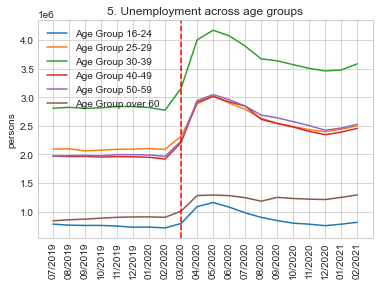

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["16-24years_unemployment"].tail(20)*100,label = "Age Group 16-24" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["25-29years_unemployment"].tail(20)*100, label = "Age Group 25-29" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["30-39years_unemployment"].tail(20)*100,label = "Age Group 30-39" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["40-49years_unemployment"].tail(20)*100, label = "Age Group 40-49" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["50-59years_unemployment"].tail(20)*100,label = "Age Group 50-59" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["60yearsandmore_unemployment"].tail(20)*100, label = "Age Group over 60" )

# setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')

# setting title and label
ax.set_ylabel('persons')
plt.title('5. Unemployment across age groups')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

In the graph "Unemployment across age groups", are graphed. The most affected group is the youngest group which is the most unskilled group, typically unskilled workers are the first to be laid off

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

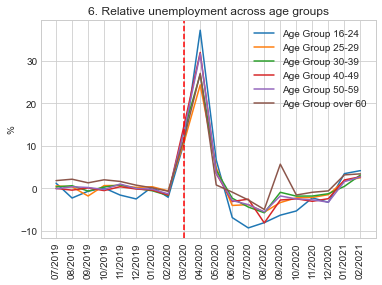

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["16-24years_unemployment_rel"].tail(20)*100,label = "Age Group 16-24" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["25-29years_unemployment_rel"].tail(20)*100, label = "Age Group 25-29" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["30-39years_unemployment_rel"].tail(20)*100,label = "Age Group 30-39" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["40-49years_unemployment_rel"].tail(20)*100, label = "Age Group 40-49" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["50-59years_unemployment_rel"].tail(20)*100,label = "Age Group 50-59" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["60yearsandmore_unemployment_rel"].tail(20)*100, label = "Age Group over 60" )

# setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')

# setting title and label
ax.set_ylabel('%')
plt.title('6. Relative unemployment across age groups')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90)

In [74]:
Unemployment_data

,Grossunemployment_unemployment,date,Men_unemployment,Women_unemployment,16-24years_unemployment,25-29years_unemployment,30-39years_unemployment,40-49years_unemployment,50-59years_unemployment,60yearsandmore_unemployment,...,60yearsandmore_unemployment_rel,lab_force_total_total_rel,lab_force_total_agegroup15-24_rel,lab_force_total_agegroup25-74_rel,lab_force_men_total_rel,lab_force_men_agegroup15-24_rel,lab_force_men_agegroup25-74_rel,lab_force_women_total_rel,lab_force_women_agegroup15-24_rel,lab_force_women_agegroup25-74_rel
0,119018.0,01/2007,48603.9,70414.1,9440.3,14678.7,34902.0,26538.7,29159.3,4299.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115165.1,02/2007,46926.8,68238.3,9243.6,14167.0,33748.3,25663.1,28106.5,4236.7,...,-0.014515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110045.9,03/2007,44921.1,65124.8,8993.8,13627.1,32117.6,24487.7,26721.5,4098.3,...,-0.032667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108612.7,04/2007,44562.1,64050.6,8854.7,13393.2,31449.8,24338.1,26441.3,4135.7,...,0.009126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105135.8,05/2007,43845.3,61290.5,8657.3,12856.3,30455.7,23592.2,25435.3,4139.0,...,0.000798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,131310.4,10/2020,67040.3,64270.1,7967.5,24858.1,35691.9,24780.5,25728.7,12283.8,...,-0.015745,0.001977,0.000000,0.002302,0.002497,-0.004566,0.002168,0.002094,0.004762,0.002453
166,128382.4,11/2020,65450.2,62932.2,7788.3,24324.7,35044.5,24022.6,25033.0,12169.4,...,-0.009313,-0.000658,-0.002331,-0.000383,-0.001245,0.000000,-0.000721,-0.000696,-0.004739,-0.000816
167,125839.2,12/2020,63445.1,62394.1,7531.7,23962.2,34596.8,23437.0,24215.8,12095.7,...,-0.006056,-0.005594,-0.023364,-0.002298,-0.003117,-0.022936,0.000000,-0.008362,-0.023810,-0.004898
168,127909.9,01/2021,64194.7,63715.2,7792.6,24385.0,34756.5,23898.5,24598.7,12478.6,...,0.031656,-0.006618,-0.009569,-0.005758,-0.004378,-0.014085,-0.002886,-0.009136,-0.004878,-0.010664


"\n# setting title and label\nax.set_ylabel('%')\nplt.title('6. Relative unemployment across age groups')\nax.legend()\n\n# label of the x-axis turned 90 degrees\nplt.xticks(rotation = 90);\n"

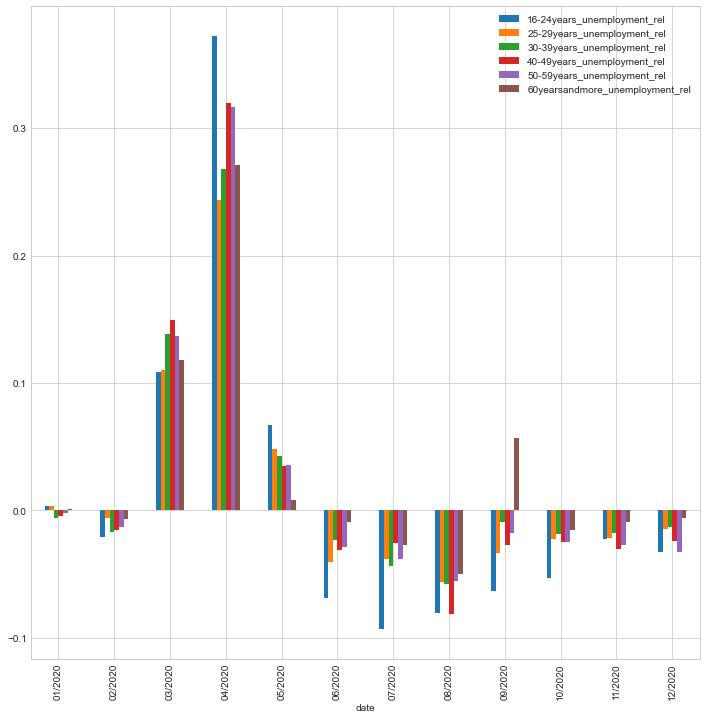

In [80]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

I = (Unemployment_data['date'].str.slice(start=3)=='2020')
Unemployment_data[I].plot.bar(x='date',y=["16-24years_unemployment_rel","25-29years_unemployment_rel","30-39years_unemployment_rel","40-49years_unemployment_rel","50-59years_unemployment_rel","60yearsandmore_unemployment_rel"],label = ["16-24years_unemployment_rel","25-29years_unemployment_rel","30-39years_unemployment_rel","40-49years_unemployment_rel","50-59years_unemployment_rel","60yearsandmore_unemployment_rel"],ax=ax)

#plotting the dataset
#for column in ["16-24years_unemployment_rel","25-29years_unemployment_rel","30-39years_unemployment_rel","40-49years_unemployment_rel","50-59years_unemployment_rel","60yearsandmore_unemployment_rel"]:
 #   Unemployment_data.tail(20).plot.bar(x='date',y=column,label = column,ax=ax)
    
#Unemployment_data.tail(10).plot.bar(x='date',y=["16-24years_unemployment_rel","25-29years_unemployment_rel","30-39years_unemployment_rel","40-49years_unemployment_rel","50-59years_unemployment_rel","60yearsandmore_unemployment_rel"],label = ["16-24years_unemployment_rel","25-29years_unemployment_rel","30-39years_unemployment_rel","40-49years_unemployment_rel","50-59years_unemployment_rel","60yearsandmore_unemployment_rel"],ax=ax)
# setting a line to show when the first lockdown took place
#plt.axvline(x = '03/2020', linestyle = "--", color = 'red')
'''
# setting title and label
ax.set_ylabel('%')
plt.title('6. Relative unemployment across age groups')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);
'''

From the "Employment force", the total employment force is depicted, two drops are seen one in March which can be directly explained by the lockdown and one in November continously through February which might be explained by the second lockdown. 
The employment force tends to fall during recessions because people tend to either seek further education or retire.

### Employment force

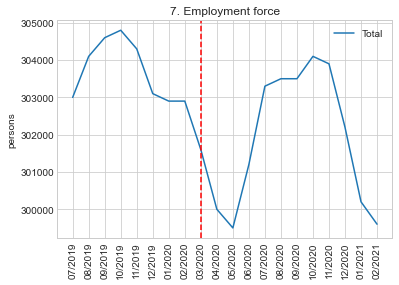

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["lab_force_total_total"].tail(20)*100, label = "Total" )

# setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')

# setting title and label
ax.set_ylabel('persons')
plt.title('7. Employment force')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

From the "Employment across genders", the labour force for women and men is depicted. One can see similar movements across the time period as expected that both genders are affected by the lockdown.

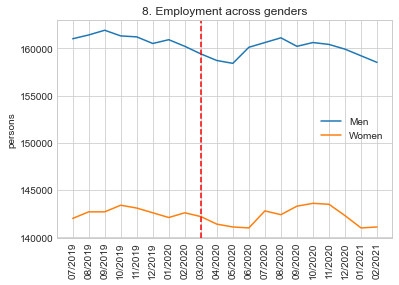

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["lab_force_men_total"].tail(20)*100,label = "Men" )
ax.plot(Unemployment_data["date"].tail(20),Unemployment_data["lab_force_women_total"].tail(20)*100, label = "Women" )

# setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')

# setting title and label
ax.set_ylabel('persons')
plt.title('8. Employment across genders')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

In the "Young labour force" graph the labour force for people between 15-24 is depicted. One can see that the lockdown did not affect the labour force significantly. However the labour force is heavily  reduced from July and onwards which can be explained by an increase in the enrollment rate for young people.

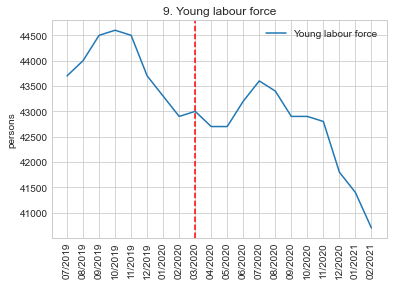

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#plotting the dataset
ax.plot(Unemployment_data["date"].tail(20), Unemployment_data["lab_force_total_agegroup15-24"].tail(20)*100,label = "Young labour force" )

#setting a line to show when the first lockdown took place
plt.axvline(x = '03/2020', linestyle = "--", color = 'red')

# setting title and label
ax.set_ylabel('persons')
plt.title('9. Young labour force')
ax.legend()

# label of the x-axis turned 90 degrees
plt.xticks(rotation = 90);

# Conclusion

Overall, we see the unemployment increases for all age groups and for both men and women however women were more severily hit. In addition as hinted in the beginning, we do see that the young people experience an increase in the unemployment and that the labour force do decrease which can be explained by an increased enrollment in education because of the change in opportunity cost.